# **Time Series Analysis of Microsoft Stock (2018 - 2025)**

## **Workflow of the Project**

<ul>
    <li>Data Collection and Loading</li>
    <li>Exploratory Data Analysis (E.D.A.)</li>
    <li>Feature Engineering</li>
    <li>Data Preprocessing</li>
    <li>Traditional Vs Non-Traditional Model Developments</li>
    <li>Model Evaluation</li>
    <li>Residual Analysis</li>
    <li>Conclusion</li>
</ul>

### Importing the Dependencies

In [128]:
# Print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Library for Warning Message
import warnings
warnings.simplefilter("ignore")

# Base Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Time Series Libraries
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Traditional Time Series Model Libraries
from statsmodels.tsa.arima.model import ARIMA

### Data Collection and Loading

In [6]:
# Data Collection Source --> "https://macrotrends.net/stocks/charts/MSFT/microsoft/stock-price-history"

# Data Loading
msft_df = pd.read_csv("microsoft_stock_data.csv", parse_dates = ["date"])

### Exploratory Data Analysis (E.D.A.)

In [8]:
# Glimpse of the first 5 rows
print("Glimpse of the first 5 rows")
print(" ")
msft_df.head()

Glimpse of the first 5 rows
 


,date,open,high,low,close,volume
0,1986-03-13,0.0543,0.0623,0.0543,0.0596,2196738
1,1986-03-14,0.0596,0.0627,0.0596,0.0617,655601
2,1986-03-17,0.0618,0.0634,0.0618,0.0628,283581
3,1986-03-18,0.0628,0.0633,0.0607,0.0612,144292
4,1986-03-19,0.0611,0.0617,0.0595,0.0601,101882


In [9]:
# Dimension of Data
print("Microsoft Stock data has {} rows and {} columns.".format(msft_df.shape[0], msft_df.shape[1]))

Microsoft Stock data has 9895 rows and 6 columns.


In [10]:
# Beginning and Ending Date
print("Start Date: {}".format(msft_df.date.min()))
print(" ")
print("End Date: {}".format(msft_df.date.max()))

Start Date: 1986-03-13 00:00:00
 
End Date: 2025-06-20 00:00:00


In [11]:
# Setting 'date' column to index
msft_df = msft_df.set_index("date")

msft_df.head()

,open,high,low,close,volume
date,,,,,
1986-03-13,0.0543,0.0623,0.0543,0.0596,2196738
1986-03-14,0.0596,0.0627,0.0596,0.0617,655601
1986-03-17,0.0618,0.0634,0.0618,0.0628,283581
1986-03-18,0.0628,0.0633,0.0607,0.0612,144292
1986-03-19,0.0611,0.0617,0.0595,0.0601,101882


Since trading does not occur on weekends and public holidays, those dates are excluded from the data. To ensure that all calendar days are represented, we will add the missing dates and fill the gaps using the previous day's closing price.

In [13]:
# Adding missing dates
all_dates = pd.date_range(start = msft_df.index.min(), end = msft_df.index.max(), freq = "D")
msft_df = msft_df.reindex(all_dates)

# Verify
nan = msft_df.isna().any(axis=1)
nan[nan == True]

1986-03-15    True
1986-03-16    True
1986-03-22    True
1986-03-23    True
1986-03-28    True
              ... 
2025-06-07    True
2025-06-08    True
2025-06-14    True
2025-06-15    True
2025-06-19    True
Length: 4450, dtype: bool

Since we're only interested in the "close" column, we'll drop all other columns from the dataset.

In [15]:
# Keep the required columns only
msft_df = msft_df[["close"]].round(2)

msft_df["close"] = msft_df["close"].ffill()

# Glimpse of the data
msft_df.head(14)

,close
1986-03-13,0.06
1986-03-14,0.06
1986-03-15,0.06
1986-03-16,0.06
1986-03-17,0.06
1986-03-18,0.06
1986-03-19,0.06
1986-03-20,0.06
1986-03-21,0.06
1986-03-22,0.06


This dataset contains records spanning from 1986 to 2025. For our analysis, we will retain only the data from the years 2018 to 2025, as these are the years relevant to our analysis.

In [17]:
# Slicing the data from 2018 - 2025
msft_df = msft_df.loc["2018" : ]

# Glimpse of the Data
msft_df.head(10)

,close
2018-01-01,78.95
2018-01-02,79.33
2018-01-03,79.70
2018-01-04,80.40
2018-01-05,81.40
2018-01-06,81.40
2018-01-07,81.40
2018-01-08,81.48
2018-01-09,81.42
2018-01-10,81.05


In [18]:
# Beginning and Ending Date after Slicing
print("Start Date after Slicing: {}".format(msft_df.index.min()))
print(" ")
print("End Date after Slicing: {}".format(msft_df.index.max()))

Start Date after Slicing: 2018-01-01 00:00:00
 
End Date after Slicing: 2025-06-20 00:00:00


In [19]:
# Final Dimensions
print("The final data contains {} rows and {} columns (including the index).".format(msft_df.shape[0], msft_df.shape[1]+1))

The final data contains 2728 rows and 2 columns (including the index).


In [20]:
# Checking of Missing Values
print("This dataset contains {} missing values.".format(msft_df.isna().sum().sum()))

This dataset contains 0 missing values.


In [21]:
# Check the Data Type for 'Close' column
print("Data Type for 'Close' Column: {}".format(msft_df.close.dtype))

# Check the Data Type for 'Date' Column (Index)
print("Data Type for 'Date' Column: {}".format(msft_df.index.dtype))

Data Type for 'Close' Column: float64
Data Type for 'Date' Column: datetime64[ns]


**Plot the Time Series of Microsoft Stock**

<Figure size 1000x500 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Closing Price')

Text(0.5, 1.0, 'Microsoft Stock Closing Price over Time')

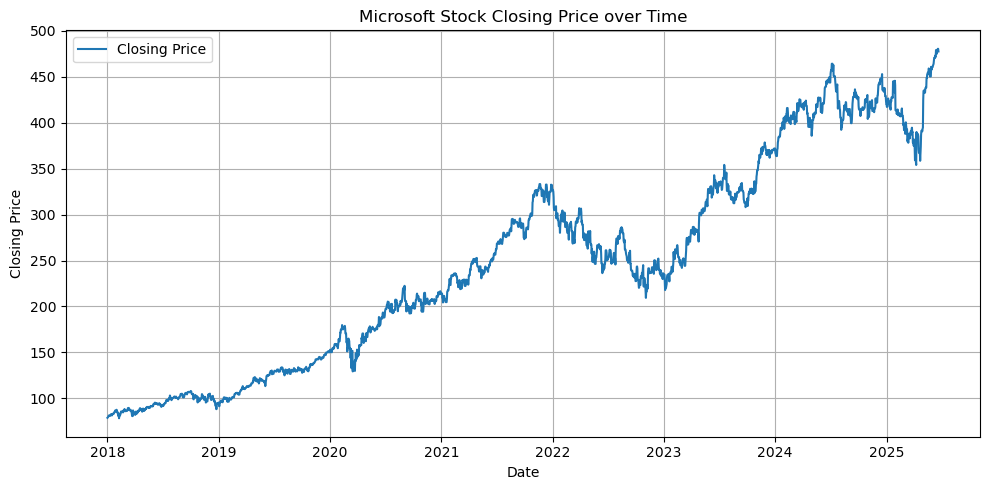

In [23]:
plt.figure(figsize = (10,5))
plt.plot(msft_df.index, msft_df["close"], label = "Closing Price")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Microsoft Stock Closing Price over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### **Stationarity Check**

**Rolling Statistics**

Rolling statistics compute summary statistics (like mean or standard deviation) over a moving window of fixed size across the time series data.

For example, if you have a time series y_t, a rolling mean with a window of size 7 computes the average of y_t from day 1 to day 7, then from day 2 to day 8, and so on.

**How does it help check Stationarity?**

A stationary time series has:

<ul>
    <li>Constant mean over time</li>
    <li>Constant variance over time</li>
    <li>No periodic patterns (seasonality or trend)</li>
</ul>

**Rolling statistics help you check this visually:**

If the rolling mean and rolling standard deviation remain relatively flat (constant) over time, the series is likely stationary. If they drift (e.g., rising mean or increasing spread), the series is non-stationary.

(a) Short-Term Moving Average and Volatility

In [28]:
# Moving average of 7 days
moving_avg_7 = msft_df["close"].rolling(window = 7).mean().dropna()

# Moving volatility of 7 days
moving_std_7 = msft_df["close"].rolling(window = 7).std().dropna()

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Moving Average')

Text(0.5, 1.0, 'Short-Term Moving Average over time (7 Days)')

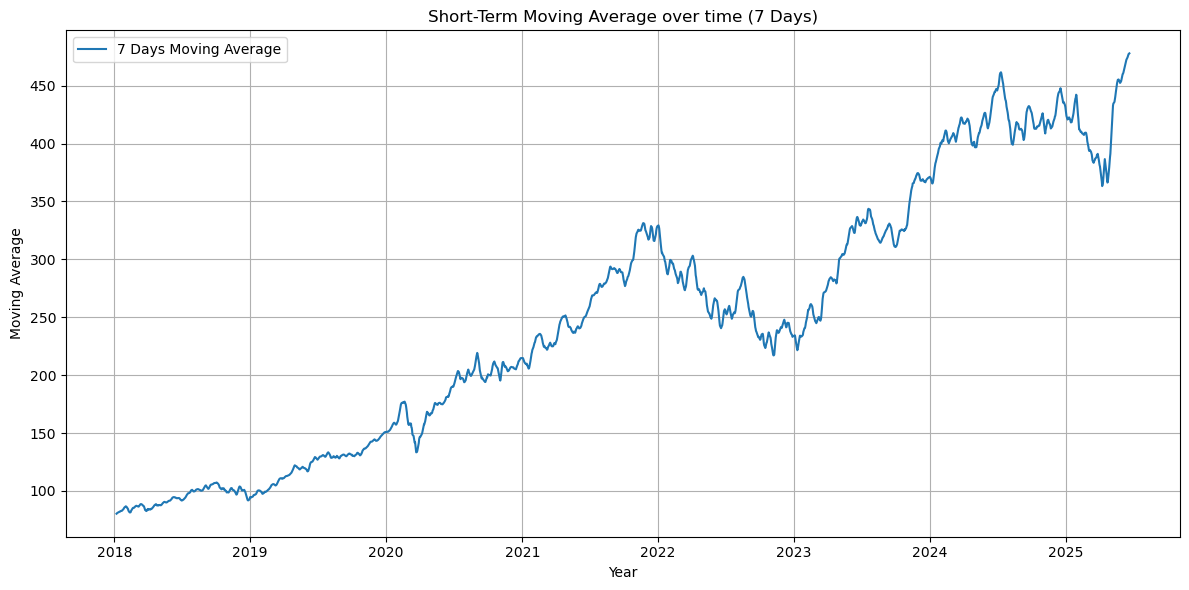

In [29]:
plt.figure(figsize = (12,6))
plt.plot(moving_avg_7, label = "7 Days Moving Average")
plt.xlabel("Year")
plt.ylabel("Moving Average")
plt.title("Short-Term Moving Average over time (7 Days)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The 7-day moving average is a smoothing technique that calculates the average closing price over the previous 7 days, updating it for each day. It helps reduce short-term noise and reveals short-term trends.

**Overall Trend:**
<ul>
    <li>The graph shows a strong upward trend from 2018 to 2022</li>
    <li>It becomes more volatile with peaks and dips—especially visible in 2022–2023</li>
    <li>The stock appears to recover strongly in 2024–2025</li>
</ul>

This tells us that Microsoft’s stock experienced:

<ul>
    <li>Long-term growth from 2018 to 2022</li>
    <li>Corrections or turbulence in 2022-23</li>
    <li>A resumption of upward momentum in 2024</li>
</ul>

**Short-Term Fluctuations:**

Even though it’s a smoothed line, you can still see:

<ul>
    <li>Local peaks and valleys, which show temporary up/down trends</li>
    <li>These fluctuations may correspond to earnings reports, market events, or macroeconomic changes</li>
</ul>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Moving Volatility')

Text(0.5, 1.0, 'Short-Term Moving Volatility over time (7 Days)')

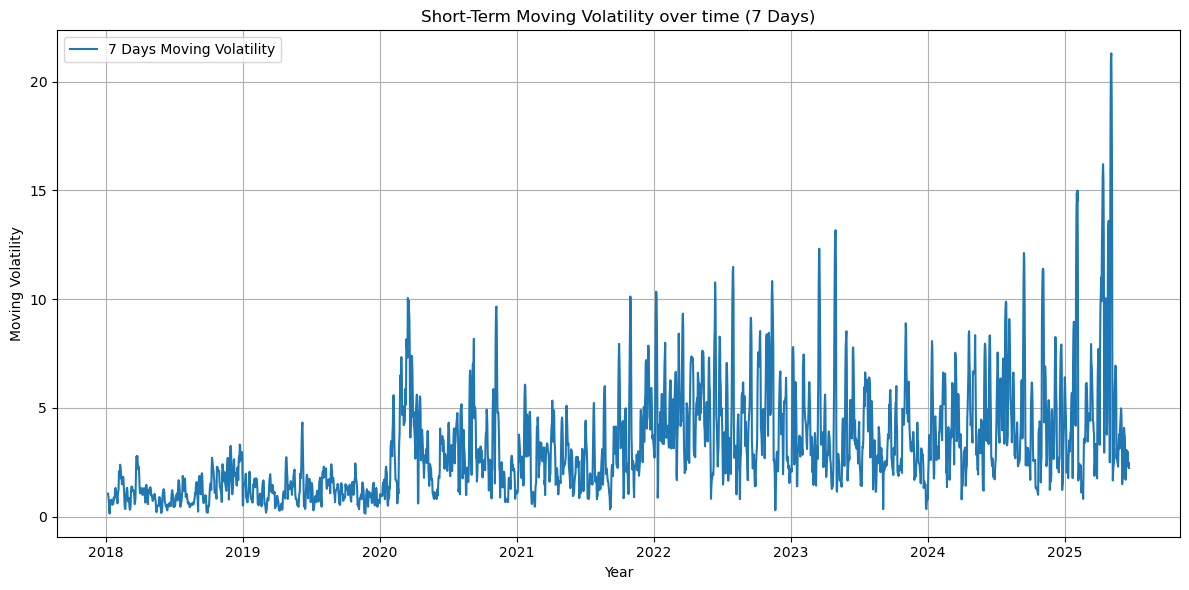

In [31]:
plt.figure(figsize = (12,6))
plt.plot(moving_std_7, label = "7 Days Moving Volatility")
plt.xlabel("Year")
plt.ylabel("Moving Volatility")
plt.title("Short-Term Moving Volatility over time (7 Days)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ul>
    <li>Each point on the line represents the standard deviation of the past 7 days of closing prices</li>
    <li>Higher spikes = more price variability (higher volatility)</li>
    <li>Lower regions = stable price movement (lower volatility)</li>
</ul>

**Overall Trend in Volatility**
<ul>
    <li>From 2018 to 2019, volatility was low and stable</li>
    <li>Starting around 2020, there's a noticeable increase in spikes, especially:</li>
</ul>
<ol>
    <li>Early 2020 (COVID-19 market shock)</li>
    <li>Mid-2022 to 2023 (global inflation, tech sector fluctuations)</li>
    <li>Late 2024 into 2025 — showing the highest volatility</li>
</ol>

**Interpretation**: The Microsoft stock became increasingly volatile over the years, suggesting market uncertainty or larger daily price swings.

(b) Medium-Term Moving Average and Volatility

In [34]:
# Moving average of 21 days
moving_avg_21 = msft_df["close"].rolling(window = 21).mean().dropna()

# Moving volatility of 21 days
moving_std_21 = msft_df["close"].rolling(window = 21).std().dropna()

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Moving Average')

Text(0.5, 1.0, 'Medium-Term Moving Average over time (21 Days)')

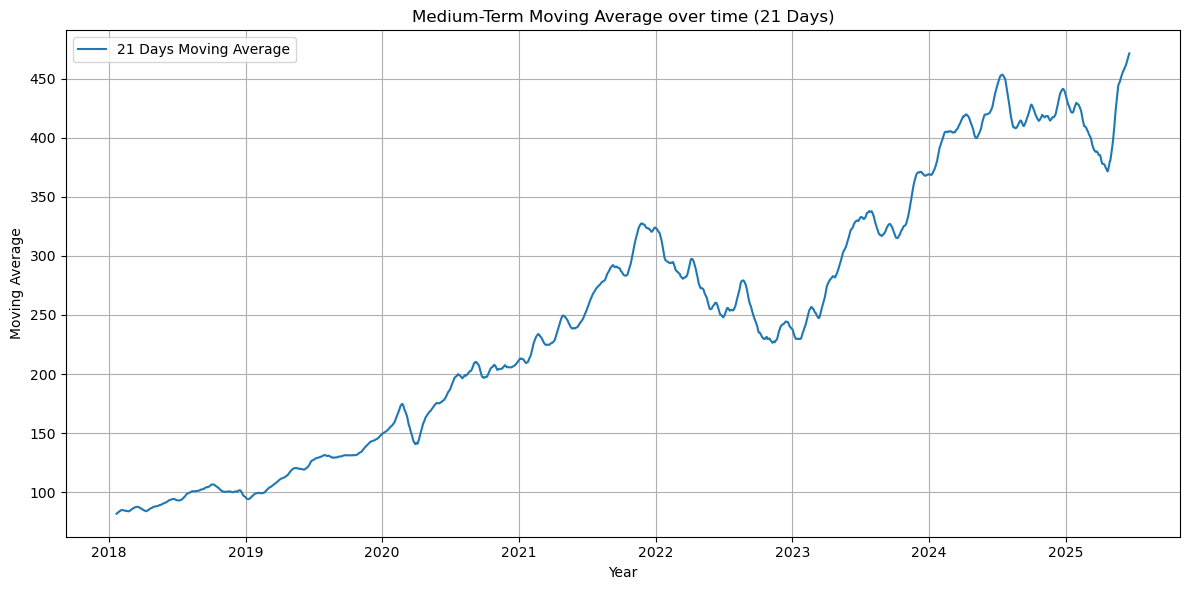

In [35]:
plt.figure(figsize = (12,6))
plt.plot(moving_avg_21, label = "21 Days Moving Average")
plt.xlabel("Year")
plt.ylabel("Moving Average")
plt.title("Medium-Term Moving Average over time (21 Days)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

A 21-day moving average smooths out the closing price over about 1 month of trading days. It helps detect monthly price trends while filtering out short-term noise.

<ul>
    <li>2018-21: Steady upward trajectory, indicating sustained growth in Microsoft's stock.</li>
    <li>2022-23: Noticeable volatility and pullbacks. The curve flattens or dips periodically, indicating market corrections or uncertain sentiment. Likely influenced by broader tech sell-offs and macroeconomic events.</li>
    <li>2024-25: Strong recovery and renewed upward movement. New all-time highs by mid-2025 suggest strong investor sentiment or strong financial performance.</li>
</ul>

**Interpretation**:

The 21-day MA is excellent for identifying medium-term trend reversals. Dips in the curve could indicate buying opportunities, while peaks may signal overbought conditions.

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Moving Volatility')

Text(0.5, 1.0, 'Medium-Term Moving Volatility over time (21 Days)')

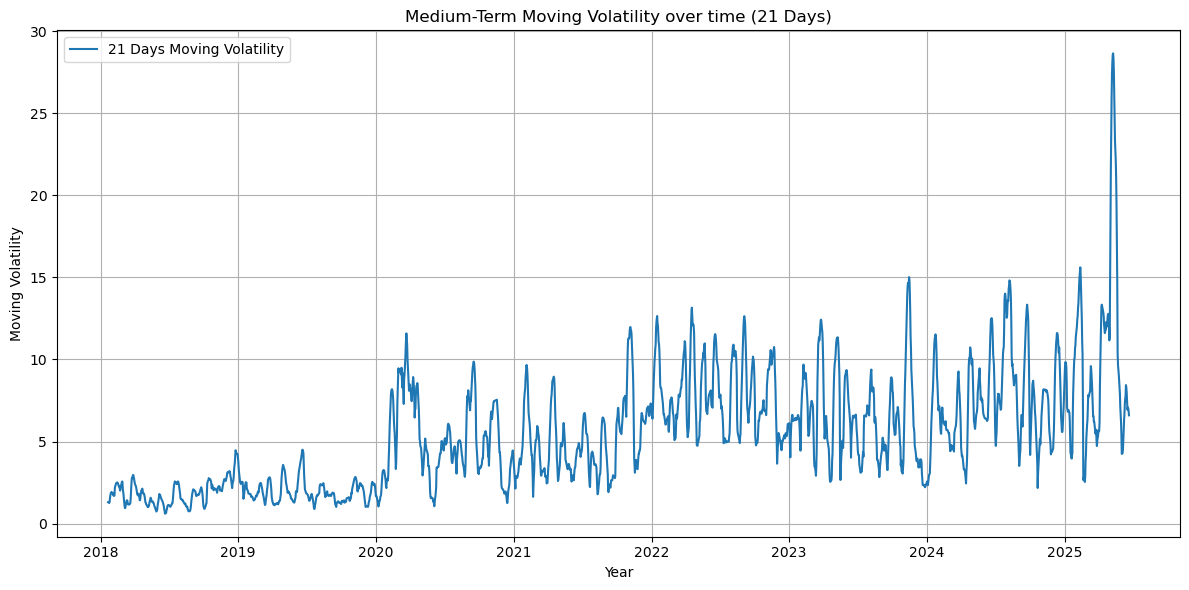

In [37]:
plt.figure(figsize = (12,6))
plt.plot(moving_std_21, label = "21 Days Moving Volatility")
plt.xlabel("Year")
plt.ylabel("Moving Volatility")
plt.title("Medium-Term Moving Volatility over time (21 Days)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ul>
    <li>2018-19: Very low volatility (~1 to 3), indicating a stable growth phase.</li>
    <li>2020 (Pandemic Onset): Sharp volatility spike, exceeding 10 — consistent with the global market panic during COVID-19.</li>
    <li>2021-22: Frequent and sharp volatility spikes, showing uncertainty in tech markets, earnings surprises, or macroeconomic pressures.</li>
    <li>Late 2024-25: Highest volatility peaks observed (approaching 30), indicating - major market reactions, possible speculative trading, or event-driven price shocks (e.g., M&A, regulation, AI-related volatility).</li>
</ul>

In [39]:
# Moving average of 63 days
moving_avg_63 = msft_df["close"].rolling(window = 63).mean().dropna()

# Moving volatility of 63 days
moving_std_63 = msft_df["close"].rolling(window = 63).std().dropna()

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Moving Average')

Text(0.5, 1.0, 'Medium-Term Moving Average over time (63 Days)')

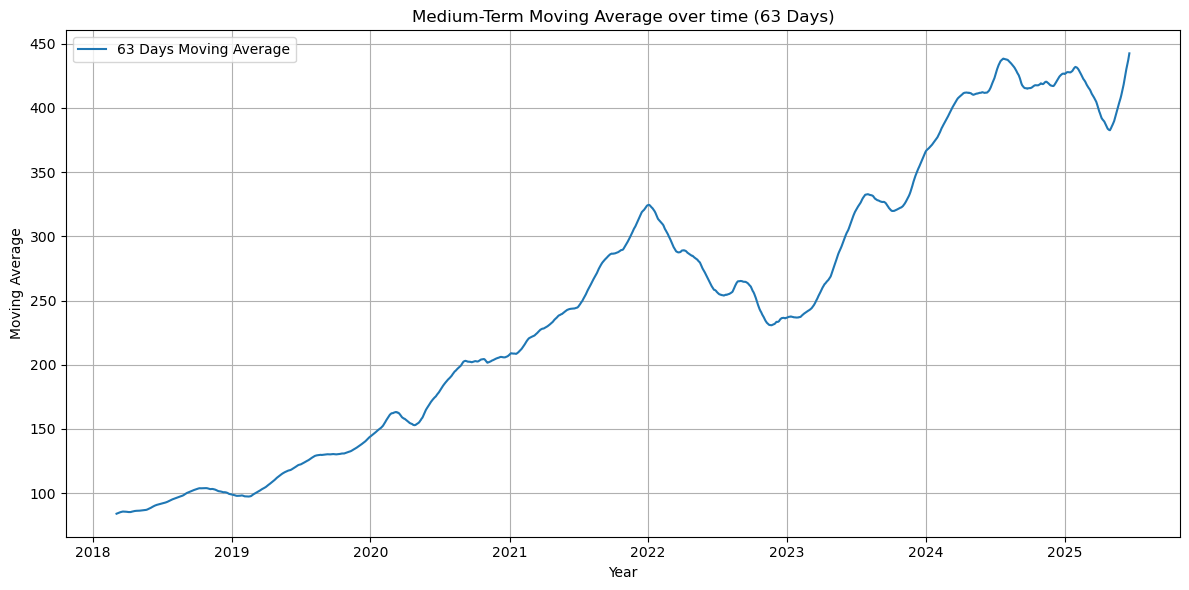

In [40]:
plt.figure(figsize = (12,6))
plt.plot(moving_avg_63, label = "63 Days Moving Average")
plt.xlabel("Year")
plt.ylabel("Moving Average")
plt.title("Medium-Term Moving Average over time (63 Days)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ul>
    <li>Trend: The 63-day moving average shows a strong overall upward trend from 2018 into mid-2022, indicating sustained growth over medium-term periods.</li>
    <li>Volatility: There's a noticeable dip and flattening in late 2022 to early 2023, similar to the 21-day moving average, suggesting a period of correction or uncertainty.</li>
    <li>Recovery: From mid-2023 onwards, the 63-day moving average shows a strong recovery and renewed upward momentum, reaching new highs in 2024 and early 2025 before a slight downturn at the very end of the visible data.</li>
    <li>Interpretation: This moving average is excellent for identifying medium-to-long term trend reversals and sustained directional movements over quarterly periods.</li>
</ul>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Moving Volatility')

Text(0.5, 1.0, 'Medium-Term Moving Volatility over time (63 Days)')

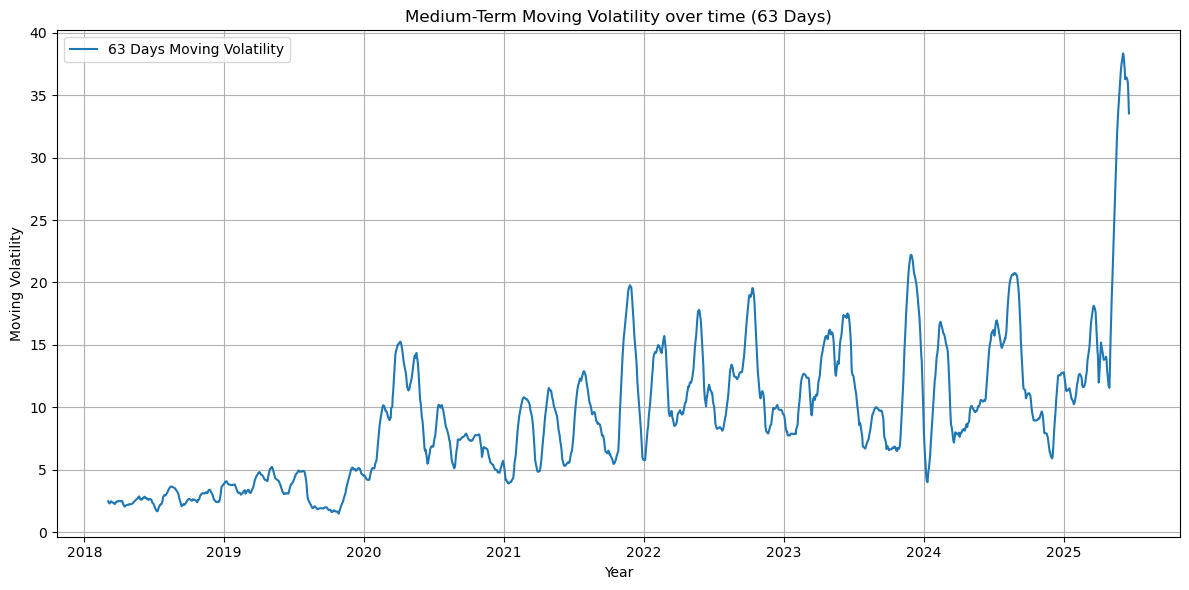

In [42]:
plt.figure(figsize = (12,6))
plt.plot(moving_std_63, label = "63 Days Moving Volatility")
plt.xlabel("Year")
plt.ylabel("Moving Volatility")
plt.title("Medium-Term Moving Volatility over time (63 Days)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ul>
    <li>Early Period (2018-2019): Volatility was relatively low and stable, generally staying below 5. This suggests a period of more predictable and less volatile price movements for Microsoft stock.</li>
    <li>Increase (2020 onwards): Similar to the shorter-term volatilities, there's a significant increase in spikes starting around 2020. This indicates higher price variability and increased market uncertainty.</li>
    <li>Higher Spikes: Noticeable peaks occur in early 2020 (likely related to the COVID-19 market shock), throughout 2022-2023 (consistent with global inflation and tech sector fluctuations), and particularly in late 2024 into 2025, where the volatility reaches its highest points (approaching 35-40).</li>
    <li>Interpretation: The increasing magnitude and frequency of spikes in the 63-day moving volatility suggest that Microsoft stock has become increasingly volatile over quarterly periods in recent years, implying larger price swings and greater market uncertainty or event-driven reactions.</li>
</ul>

(c) Long-Term Moving Average and Volatility

In [45]:
# Moving average of 252 days
moving_avg_252 = msft_df["close"].rolling(window = 252).mean().dropna()

# Moving volatility of 252 days
moving_std_252 = msft_df["close"].rolling(window = 252).std().dropna()

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Moving Average')

Text(0.5, 1.0, 'Long-Term Moving Average over time (252 Days)')

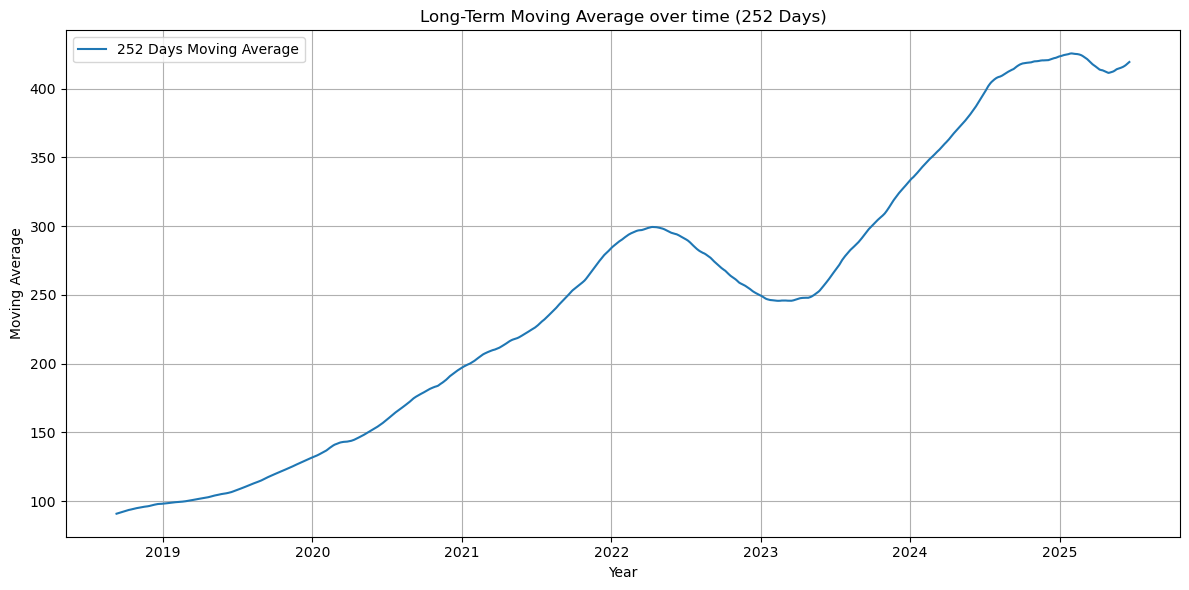

In [46]:
plt.figure(figsize = (12,6))
plt.plot(moving_avg_252, label = "252 Days Moving Average")
plt.xlabel("Year")
plt.ylabel("Moving Average")
plt.title("Long-Term Moving Average over time (252 Days)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ul>
    <li>Long-Term Growth: The plot shows a strong and consistent upward trajectory from 2019 through mid-2022, reflecting significant long-term growth in Microsoft's stock price.</li>
    <li>Flattening/Dip: There is a noticeable flattening and slight dip in the curve from mid-2022 to early 2023, indicating a period where the long-term growth slowed or slightly reversed. This suggests a more prolonged period of market correction or uncertainty compared to shorter-term analyses.</li>
    <li>Renewed Upward Trend: From mid-2023 onwards, the 252-day moving average demonstrates a robust recovery and a clear resumption of the upward trend, reaching new long-term highs in 2024 and 2025.</li>
    <li>Interpretation: This long-term moving average is crucial for understanding the overall, underlying trend of Microsoft's stock, effectively filtering out short-term and medium-term noise to reveal the sustained direction of the stock's price. It highlights periods of consistent long-term growth and sustained market sentiment changes.</li>
</ul>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Moving Volatility')

Text(0.5, 1.0, 'Long-Term Moving Volatility over time (252 Days)')

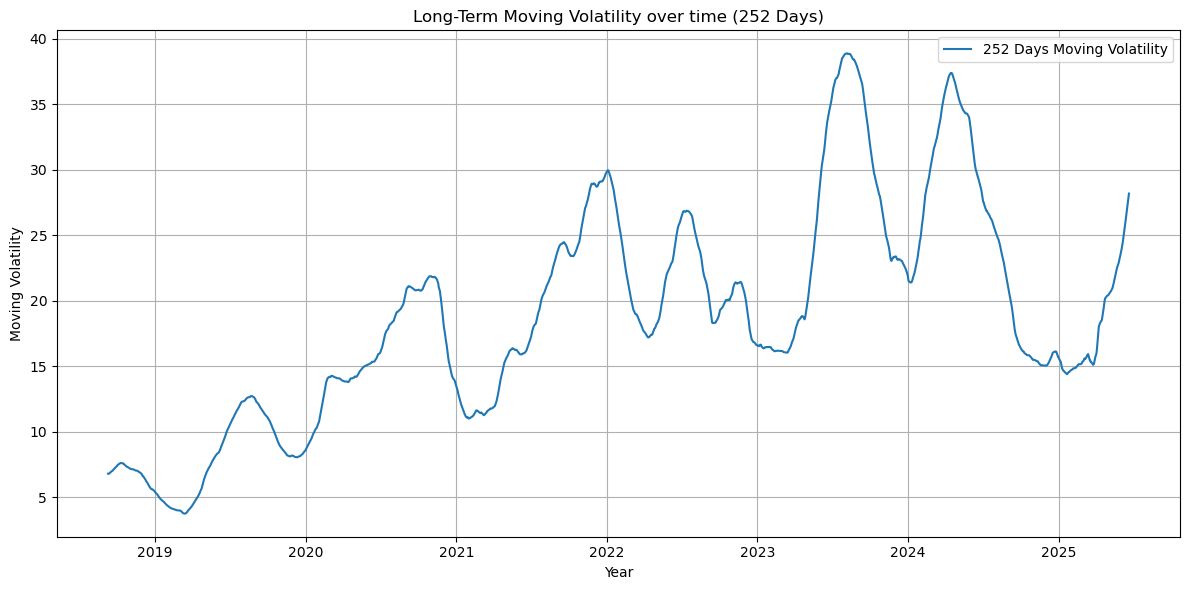

In [48]:
plt.figure(figsize = (12,6))
plt.plot(moving_std_252, label = "252 Days Moving Volatility")
plt.xlabel("Year")
plt.ylabel("Moving Volatility")
plt.title("Long-Term Moving Volatility over time (252 Days)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ul>
    <li>Early Stability (2018-2019): Volatility was relatively low and stable, generally below 10, indicating a period of long-term price stability.</li>
    <li>Increasing Volatility: From late 2019/early 2020 onwards, the 252-day moving volatility shows a general upward trend with several significant peaks. This indicates that the long-term price fluctuations have become more pronounced.</li>
    <li>Major Peaks: Notable peaks are observed around late 2020, throughout 2022, and especially in 2024, where the volatility reaches its highest points (approaching 40). These peaks suggest prolonged periods of increased uncertainty, significant market events, or sustained changes in investor behavior that led to larger price swings over a yearly horizon.</li>
    <li>Interpretation: The 252-day moving volatility provides insight into the long-term stability or instability of Microsoft's stock. The overall increasing trend and higher peaks suggest that while the stock has experienced significant long-term growth, this growth has come with increased inherent risk and larger price variations over annual periods.</li>
</ul>

**Augmented Dickey-Fuller (ADF) Test** 

<ul>
    <li>Purpose: Formally tests for unit root (non-stationarity)</li>
    <li>Null Hypothesis (H₀): Series is non-stationary</li>
    <li>Alternative Hypothesis (H₁): Series is stationary</li>
    <li>Output: Test statistic and p-value</li>
    <li>If p-value < 0.05 and test statistics is more negative, reject H₀ ⇒ data is stationary</li>
</ul>

In [52]:
adf = adfuller(msft_df['close'])

# Test Statistics
print("Test Statistics: {}".format(adf[0]))
print(" ")

# p-Value
print("p-value: {}".format(adf[1]))
print(" ")

# Critical Value (5%)
print("Critical Value (5%): {}".format(adf[4]['5%']))

Test Statistics: -0.09098316562053906
 
p-value: 0.9503292719776542
 
Critical Value (5%): -2.8626063225123146


**Observation**:

1. Test Statistic > Critical Value (i.e., -0.09 > -2.86): Fail to reject the null hypothesis.

2. p-value = 0.95 (≫ 0.05): Again, this supports failing to reject the null hypothesis.

From the rolling statistics and ADF test, we checked that the data is non-stationary.

#### **Decompose the Time Series**

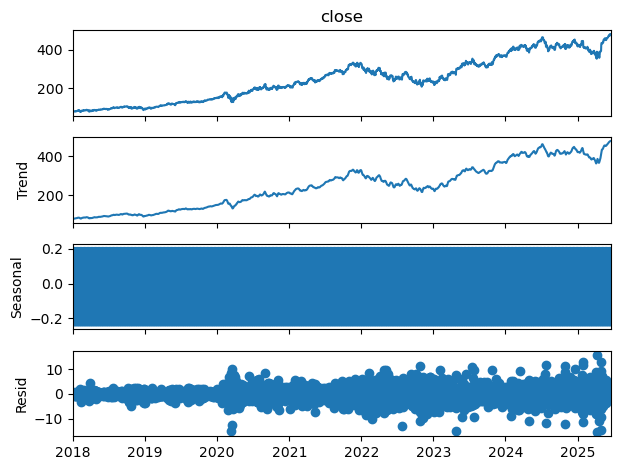

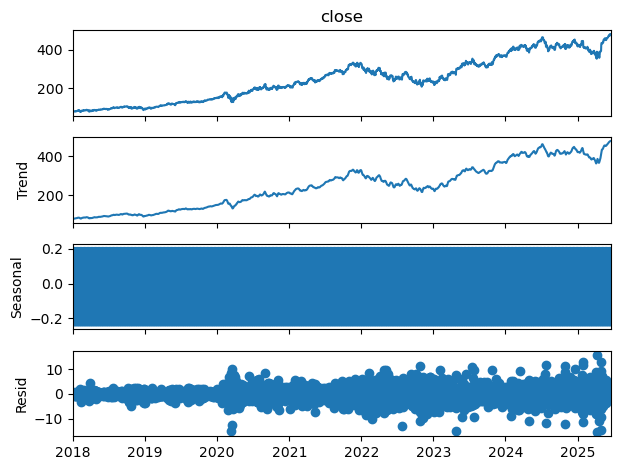

In [56]:
decomposition_7 = seasonal_decompose(msft_df['close'], model = 'additive', period = 7)

decomposition_7.plot()

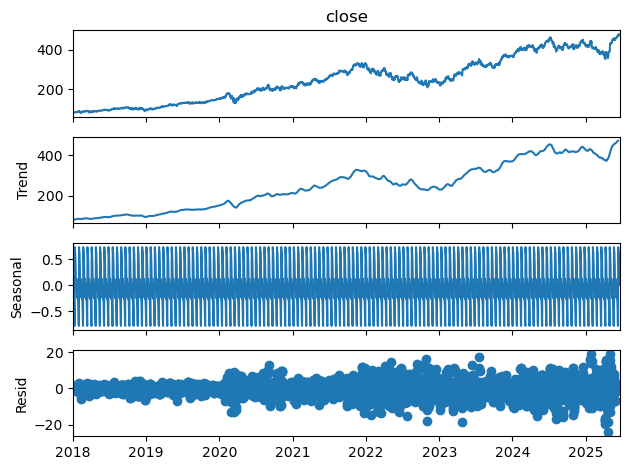

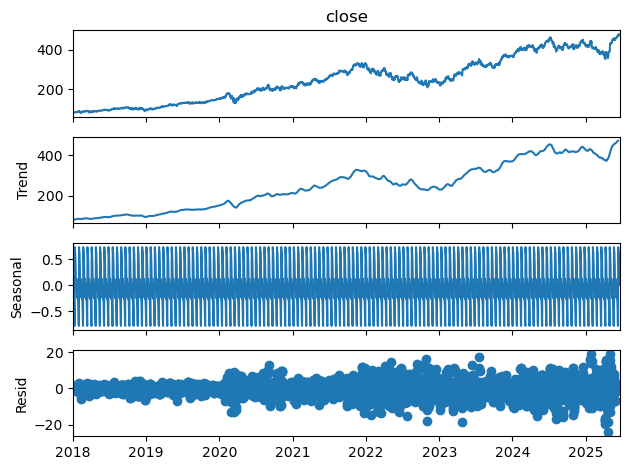

In [57]:
decomposition_21 = seasonal_decompose(msft_df['close'], model = 'additive', period = 21)

decomposition_21.plot()

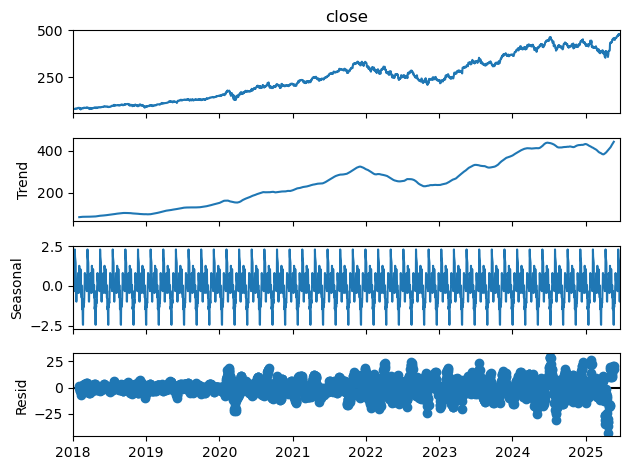

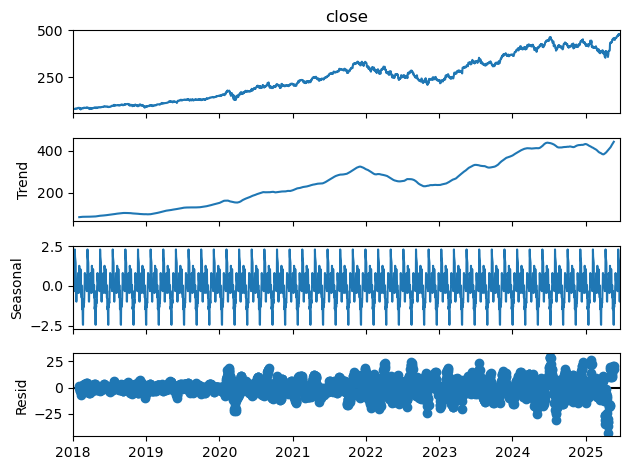

In [58]:
decomposition_63 = seasonal_decompose(msft_df['close'], model = 'additive', period = 63)

decomposition_63.plot()

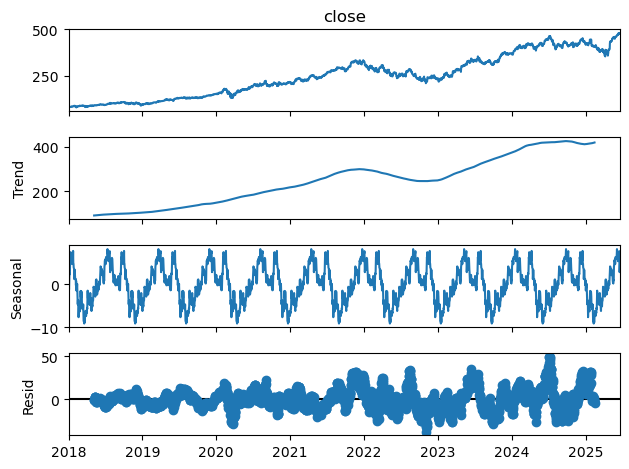

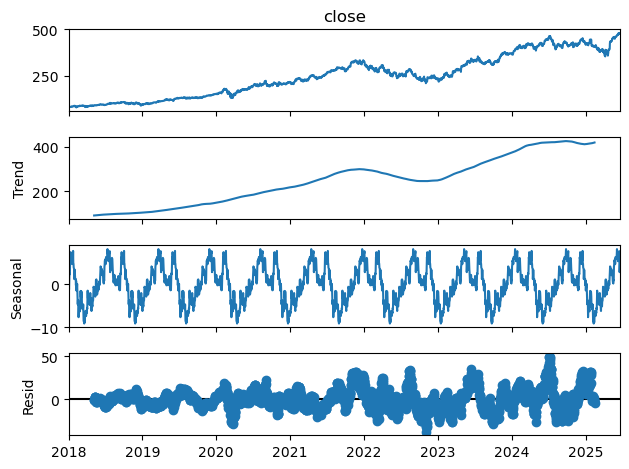

In [59]:
decomposition_252 = seasonal_decompose(msft_df['close'], model = 'additive', period = 252)

decomposition_252.plot()

1. Original Series (Close)

The original Microsoft stock closing price shows a consistent upward trend with fluctuations across all decompositions, aligning with observed moving averages.

2. Trend Component
<ul>
    <li>7-Day: Captures short-term directional shifts.</li>
    <li>21-Day: Highlights monthly trends, showing growth (2018–2021), volatility (2022–2023), and strong recovery (2024–2025).</li>
    <li>63-Day: Smooths out noise to show quarterly trends—strong growth until mid-2022, a dip, and recovery starting mid-2023.</li>
    <li>252-Day: Represents long-term growth, clearly showing sustained gains, a flattening in 2022–2023, and a robust rise thereafter.</li>
    <li>Overall: Trend becomes smoother with larger windows, revealing the underlying long-term movement.</li>
</ul>

3. Seasonal Component
<ul>
    <li>7-Day: Flat, indicating no weekly seasonality.</li>
    <li>21-Day: Minor monthly cyclicality with low amplitude.</li>
    <li>63-Day: Clear quarterly seasonality with moderate amplitude.</li>
    <li>252-Day: Strong annual patterns with high amplitude, indicating consistent yearly cycles.</li>
    <li>Overall: Seasonality grows more prominent with longer decomposition windows.</li>
</ul>

4. Residual Component
<ul>
    <li>Outliers: Spikes highlight events not captured by trend or seasonality (e.g., market shocks).</li>
    <li>Variance: Residuals increase in magnitude over time, especially post-2024, indicating rising unpredictability.</li>
    <li>Overall: Residual patterns are similar across decompositions but grow in volatility over time.</li>
</ul>

#### **Time Series Transformation**

Stationarity Method: **Differencing**

In [63]:
# First Difference
msft_df["first_diff"] = msft_df["close"].diff().dropna()
msft_df.dropna(inplace = True)

# Glimpse of the data
msft_df.head(10)

,close,first_diff
2018-01-02,79.33,0.38
2018-01-03,79.70,0.37
2018-01-04,80.40,0.70
2018-01-05,81.40,1.00
2018-01-06,81.40,0.00
2018-01-07,81.40,0.00
2018-01-08,81.48,0.08
2018-01-09,81.42,-0.06
2018-01-10,81.05,-0.37
2018-01-11,81.29,0.24


In [64]:
# Rerun the adf test
adf_d1 = adfuller(msft_df["first_diff"])

# Test Statistics (First Order Differencing)
print("Test Statistics (First Order Differencing): {}".format(adf_d1[0]))
print(" ")

# p-Value (First Order Differencing)
print("p-value (First Order Differencing): {}".format(adf_d1[1]))
print(" ")

# Critical Value (5%) (First Order Differencing)
print("Critical Value (5%) (First Order Differencing): {}".format(adf_d1[4]['5%']))

Test Statistics (First Order Differencing): -13.97432176699672
 
p-value (First Order Differencing): 4.2889884129443746e-26
 
Critical Value (5%) (First Order Differencing): -2.8626063225123146


In [65]:
if (adf_d1[0] < adf_d1[4]['5%']) and (adf_d1[1] < 0.05):
    print("Rejected the Null Hypothesis. Hence, the data is stationary.")
else:
    print("Fail to reject the Null Hypothesis. Hence, the data is non-stationary.")

Rejected the Null Hypothesis. Hence, the data is stationary.


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Closing Price')

Text(0.5, 1.0, 'Stationary Vs Non-Stationary of Microsoft Stock over Time')

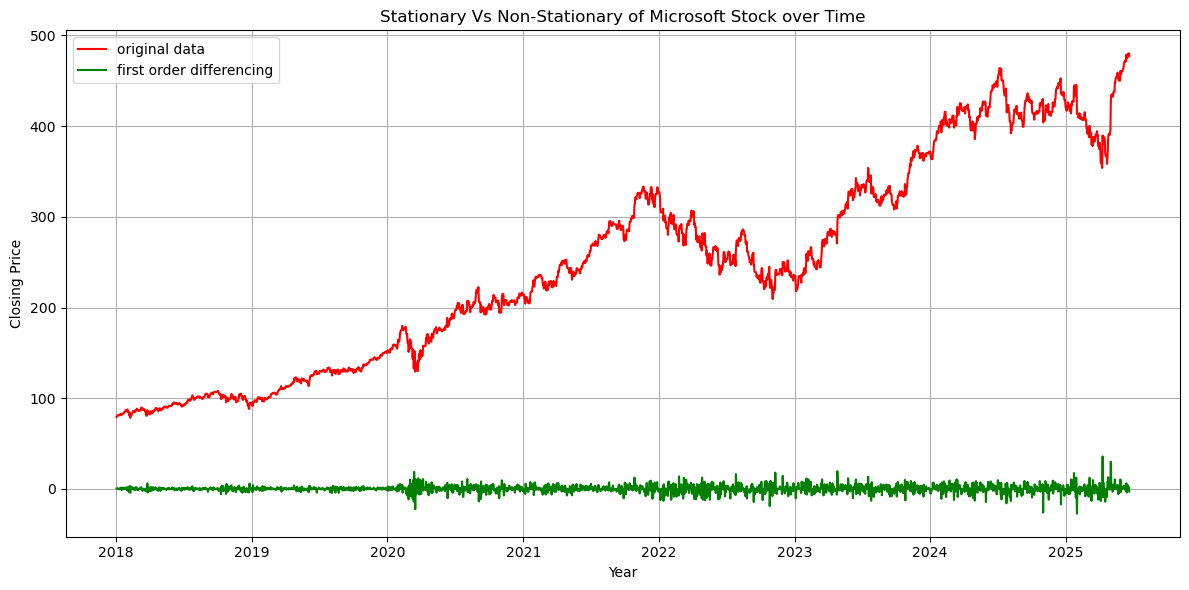

In [66]:
# Plot the Time Series
plt.figure(figsize = (12,6))
plt.plot(msft_df["close"], color = "red", label = "original data")
plt.plot(msft_df["first_diff"], color = "green", label = "first order differencing")
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("Stationary Vs Non-Stationary of Microsoft Stock over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### **Correlation & Lags**

Autocorrelation & Partial Autocorrelation

**ACF and PACF plot should be plotted on non-stationary or stationary data?**

In time series analysis, ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots should ideally be plotted on stationary data.

1. Purpose of ACF and PACF:

They help in identifying the order of AR (AutoRegressive) and MA (Moving Average) components in an ARIMA or SARIMA model. These models assume that the input time series is stationary.

2. Non-stationary data leads to misleading ACF/PACF:

If you plot ACF/PACF on non-stationary data (e.g., trending or seasonal), the plots often show slowly decaying autocorrelations, which are hard to interpret. You'll likely see high autocorrelations across many lags, making it difficult to determine the actual order.

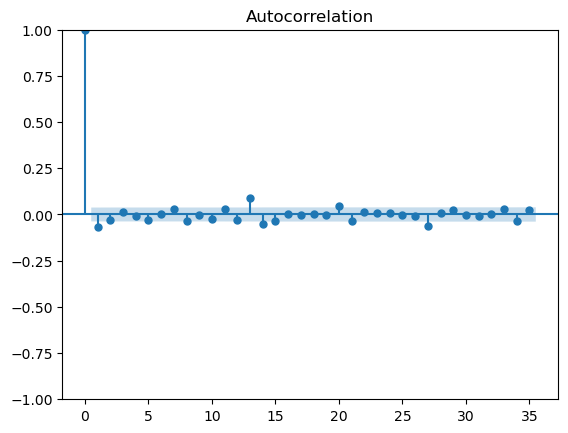

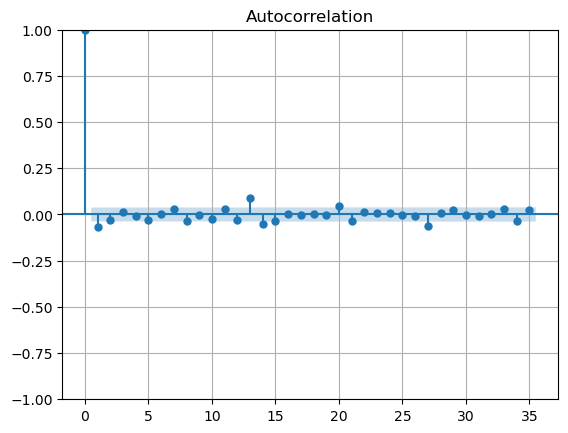

In [70]:
# Autocorrelation
plot_acf(msft_df['first_diff'].dropna())
plt.grid()

The ACF measures the correlation between a time series and a lagged version of itself. For example, the ACF at lag 1 measures the correlation between Yt and Yt−1, at lag 2 it measures the correlation between Yt and Yt−2, and so on. In the plot, the blue spikes represent the autocorrelation values at different lags, and the shaded blue region represents the confidence interval. If a spike extends beyond this confidence interval, it indicates a statistically significant correlation.

<ul>
    <li>Lag 0: The ACF at lag 0 is always 1, as a series is perfectly correlated with itself.</li>
    <li>Significant Lag at 1: The most prominent spike is at lag 1, indicating a strong positive correlation between the current closing price and the closing price of the previous day. This is typical for stock prices, as today's price is heavily influenced by yesterday's price.</li>
    <li>Rapid Decay: After lag 1, the ACF values quickly drop and remain mostly within the blue shaded region (confidence interval), with only a few minor spikes slightly outside, particularly around lag 13.</li>
</ul>

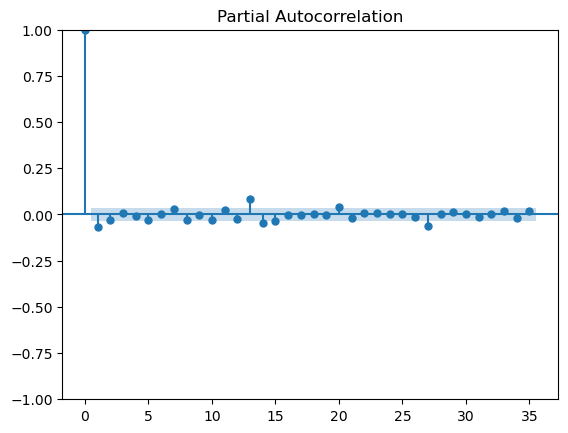

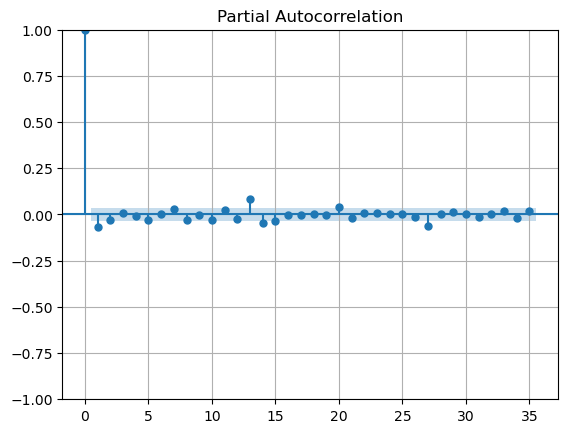

In [72]:
# Partial Autocorrelation
plot_pacf(msft_df['first_diff'].dropna())
plt.grid()

The PACF measures the correlation between a time series and a lagged version of itself, after controlling for the effects of all intermediate lags. For example, the PACF at lag 3 measures the correlation between Yt and Yt−3, but only the direct correlation that is not explained by the influence of Yt−1 and Yt−2. Like the ACF, spikes outside the shaded region are statistically significant.

<ul>
    <li>Lag 0: Similar to ACF, PACF at lag 0 is 1.</li>
    <li>Significant Lag at 1: The PACF also shows a strong positive spike at lag 1, indicating a direct significant relationship between the current observation and the immediately preceding one.</li>
    <li>Immediate Drop: After lag 1, the PACF values immediately drop to near zero and stay mostly within the confidence interval, similar to the ACF. The minor spike around lag 13 is also present but remains within the bounds for most parts.</li>
</ul>

### Model Development

<ol>
    <li>ARIMA</li>
</ol>

In [77]:
# Dataset for ARIMA Model
arima_df = msft_df[["close"]]

# Glimse of the Data
arima_df.head()

,close
2018-01-02,79.33
2018-01-03,79.70
2018-01-04,80.40
2018-01-05,81.40
2018-01-06,81.40


<font color = "blue">(a) Time-based Train-Validation-Test Split</font>

<ul>
    <li>Training Set (5 Years): 2018 - 2022</li>
    <li>Validation Set (1 Year): 2023</li>
    <li>Test Set (~1.5 Years): 2024 - mid 2025</li>
</ul>

In [120]:
df_train = arima_df.loc["2018-01-02" : "2022-12-31"]
df_val = arima_df.loc["2023-01-01" : "2023-12-31"]
df_test = arima_df.loc["2024-01-01" : "2025-06-20"]

print("The training data contains {} days.".format(len(df_train)))
print(" ")
print("The validation data contains {} days.".format(len(df_val)))
print(" ")
print("The test data contains {} days.".format(len(df_test)))

The training data contains 1825 days.
 
The validation data contains 365 days.
 
The test data contains 537 days.


<font color = "blue">(b) Visualize the Split</font>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Closing Price')

Text(0.5, 1.0, 'Train Vs Validation Vs Test Data')

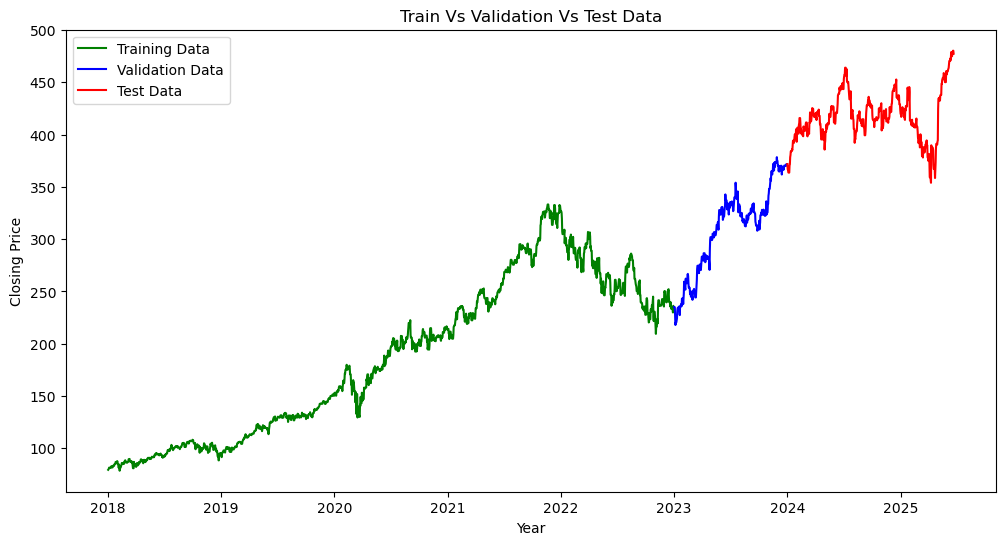

In [124]:
plt.figure(figsize = (12,6))
plt.plot(df_train['close'], label = "Training Data", color = "Green")
plt.plot(df_val['close'], label = "Validation Data", color = "Blue")
plt.plot(df_test['close'], label = "Test Data", color = "Red")
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("Train Vs Validation Vs Test Data")
plt.legend()
plt.show()

<font color = "blue">(c) Fit the ARIMA model on Training Data</font>

From the above ACF / PACF plot and stationarity checks, we got p = 1 (PACF), q = 1 (ACF), and d = 1 (First Order Differencing). 

In [134]:
# Initialize the ARIMA Model on Training Data
arima_model = ARIMA(df_train['close'], order = (13, 1, 13))

# Fit the ARIMA Model
arima_model_fit = arima_model.fit()

# Summary of the ARIMA Model
print("Summary of the ARIMA Model")
print(" ")
print(arima_model_fit.summary())

Summary of the ARIMA Model
 
                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1825
Model:               ARIMA(13, 1, 13)   Log Likelihood               -4633.968
Date:                Mon, 23 Jun 2025   AIC                           9321.936
Time:                        21:59:22   BIC                           9470.673
Sample:                    01-02-2018   HQIC                          9376.804
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4084      0.150     -2.727      0.006      -0.702      -0.115
ar.L2         -0.1987      0.168     -1.186      0.236      -0.527       0.130
ar.L3         -0.4780  